# 16.Skl_tree

의사결정트리 학습에서 각 노드에 분기하기 위한 최적의 질문은 정보이득 (Information Gain)이라는 값이 최대가 되도록 만들어주는 것이 핵심이다.
정보 이득은 자식노드의 데이터 불순도가 작으면 작을수록 커지게 된다

데이터의 불순도를 측정하는 방법은 아래와 같이 3가지 방법이 있다.
1. 지니 인덱스 (Gini Index)
2. 엔트로피 (Entropy)
3. 분류오류 (Classification Error)

In [2]:
의사결정 트리 사용이 필요하다면 그때 그때 식을 찾아보자
3가지 다 계산해서 좋은 것을 선택하도록 한다.

SyntaxError: invalid syntax (<ipython-input-2-93d22edc2dc7>, line 1)

총 테스트 개수 : 45, 오류개수 : 1
정확도: 0.98


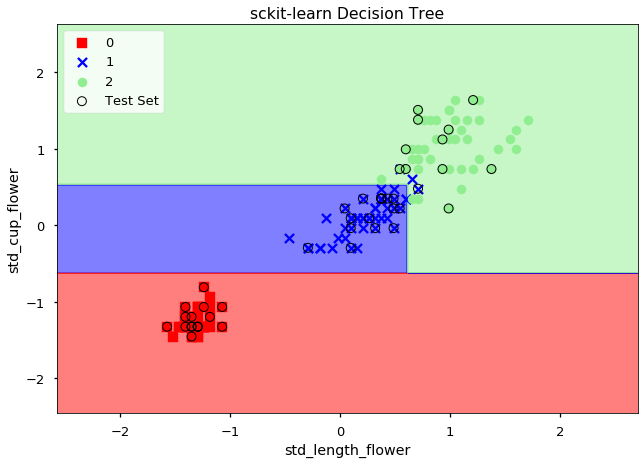

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import style
from plotdregion import plot_decision_region
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

style.use('seaborn-talk')

if __name__ == '__main__':
    iris = datasets.load_iris()
    X = iris.data[:,[2,3]]
    y = iris.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
   
    sc = StandardScaler()
    sc.fit(X_train) # X_train의 평균과 표준편차를 구함
    X_train_std = sc.transform(X_train) # 트레이닝 데이터를 표준화
    X_test_std = sc.transform(X_test) # 테스트 데이터를 표준화
   
    #ml = Perceptron(eta0=0.01, max_iter=40, random_state=0)
    #ml = LogisticRegression(C=1000.0, random_state=0)
    #ml = SVC(kernel='linear', C=1.0, random_state=0)
    #ml = SVC(kernel='rbf', C=10.0, gamma=0.10, random_state=0) #비선형 모델 적용 SVM
    #ml = SGDClassifier(loss='perceptron') #확률적 경사하강법 적용 퍼셉트론
    #ml = SGDClassfier(loss='log') #확률적 경사하강법 적용 로지스틱 회귀
    #ml = SGDClassfier(loss='hinge') #확률적 경사하강법 적용 SVM
    ml = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
   
    ml.fit(X_train_std, y_train)
    y_pred = ml.predict(X_test_std)
    print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != y_pred).sum()))
    print('정확도: %.2f' %accuracy_score(y_test, y_pred))
   
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_region(X=X_combined_std, y=y_combined, classifier=ml, test_idx=range(105,150), title='sckit-learn Decision Tree')